# Deep learning Disease Classifier
The data set I'm using is the [Symptom2Disease](https://www.kaggle.com/datasets/niyarrbarman/symptom2disease) database on kaggle. It lists 24 different diseases each with a patient of those diseases describing the symptoms. Below are three graphs showing the total number of cases for each disease, and the number of cases for ech disease in the train and test charts.

In [1]:
# some necessary packages
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
import pickle
import numpy as np
import pandas as pd

# set seed for reproducibility
np.random.seed(6969)

In [2]:
df = pd.read_csv('Symptom2Disease.csv', header=0, usecols=[1,2], encoding='latin-1')
df = df.sample(frac=1).reset_index(drop=True)
print('rows and columns:', df.shape)
print(df.head())

rows and columns: (1200, 2)
                   label                                               text
0   Cervical spondylosis  I have been struggling with back pain, a persi...
1  Dimorphic Hemorrhoids  Lately I've been experiencing constipation and...
2  Dimorphic Hemorrhoids  I've been finding it challenging to use the re...
3               Migraine  Along with distorted eyesight, excessive appet...
4               diabetes  I have a frequent need to urinate and often ha...


In [3]:
i = np.random.rand(len(df)) < 0.8
train = df[i]
test = df[~i]
print("train data size: ", train.shape)
print("test data size: ", test.shape)

train data size:  (977, 2)
test data size:  (223, 2)


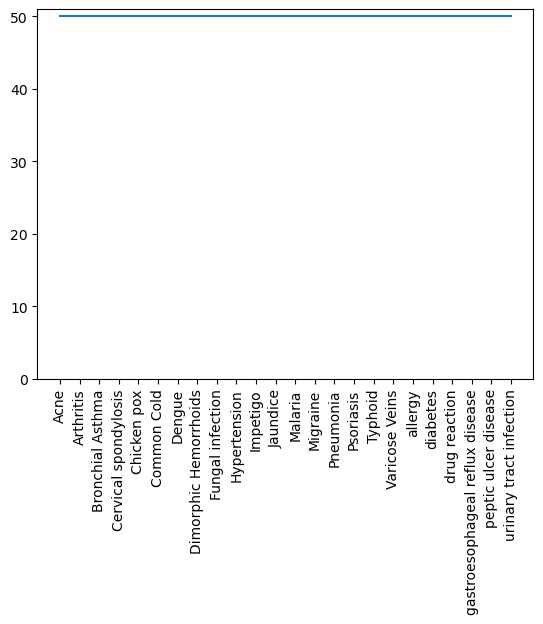

In [4]:
dfCount = df.groupby(['label']).count() #Shows distribution of total
plt.plot(dfCount)
plt.xticks(rotation=90)
plt.gca().set_ylim([0, 51])
plt.show()

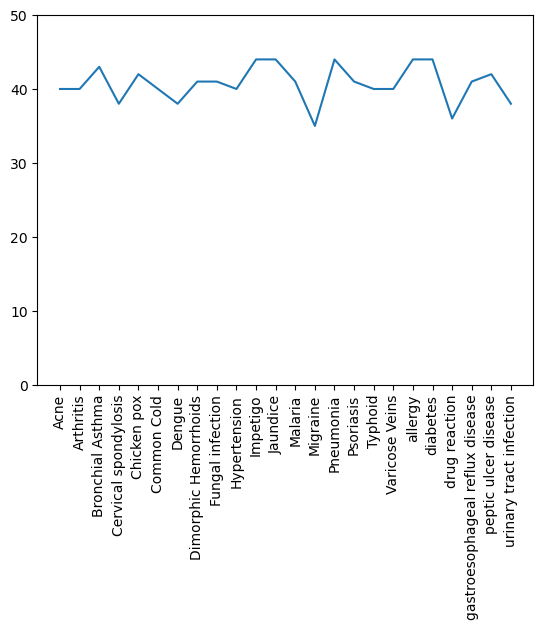

In [5]:
trainCount = train.groupby(['label']).count() #Shows distribution of train data
plt.plot(trainCount)
plt.xticks(rotation=90)
plt.gca().set_ylim([0, 50])
plt.show()

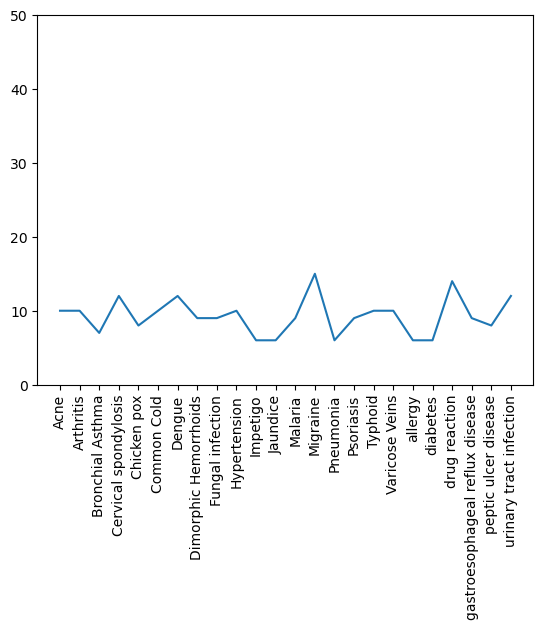

In [6]:
testCount = test.groupby(['label']).count() #Shows distribution of test data
plt.plot(testCount)
plt.xticks(rotation=90)
plt.gca().set_ylim([0, 50])
plt.show()

For the total number of cases, every disease has 50 each. As we can see there is some random variation between the cases due to them being sorted and placed randomly, however I beleive it's a good enough distribution between each disease to have it be reliable for each database.

In [7]:
# set up X and Y
num_labels = 24 #number of diseases
vocab_size = 50000
batch_size = 1200

# fit the tokenizer on the training data
tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(train.text)

x_train = tokenizer.texts_to_matrix(train.text, mode='tfidf')
x_test = tokenizer.texts_to_matrix(test.text, mode='tfidf')

encoder = LabelEncoder()
encoder.fit(train.label)
y_train = encoder.transform(train.label)
y_test = encoder.transform(test.label)

# check shape
print("train shapes:", x_train.shape, y_train.shape)
print("test shapes:", x_test.shape, y_test.shape)
print("test first five labels:", y_test[:5])

train shapes: (977, 50000) (977,)
test shapes: (223, 50000) (223,)
test first five labels: [13 19  2  2  1]


In [11]:
# fit model
model = models.Sequential()
model.add(layers.Dense(32, input_dim=vocab_size, kernel_initializer='normal', activation='relu'))
model.add(layers.Dense(1, kernel_initializer='normal', activation='relu'))
 
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
 
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=30,
                    verbose=1,
                    validation_split=0.1)

Epoch 1/30
1/1 [==============================] - 8s 8s/step - loss: 62.4743 - accuracy: 0.0410 - val_loss: 38.4955 - val_accuracy: 0.0408
Epoch 2/30
1/1 [==============================] - 1s 1s/step - loss: 42.5256 - accuracy: 0.0421 - val_loss: 25.1655 - val_accuracy: 0.0408
Epoch 3/30
1/1 [==============================] - 1s 833ms/step - loss: 27.8288 - accuracy: 0.0432 - val_loss: 15.6756 - val_accuracy: 0.0408
Epoch 4/30
1/1 [==============================] - 1s 604ms/step - loss: 17.6666 - accuracy: 0.0455 - val_loss: 11.7694 - val_accuracy: 0.0408
Epoch 5/30
1/1 [==============================] - 1s 520ms/step - loss: 11.0611 - accuracy: 0.0478 - val_loss: 6.1084 - val_accuracy: 0.0408
Epoch 6/30
1/1 [==============================] - 1s 625ms/step - loss: 6.3492 - accuracy: 0.0501 - val_loss: 2.5789 - val_accuracy: 0.0510
Epoch 7/30
1/1 [==============================] - 1s 552ms/step - loss: 0.2215 - accuracy: 0.0489 - val_loss: -2.0447 - val_accuracy: 0.0714
Epoch 8/30
1/1 [

In [12]:
# evaluate
score = model.evaluate(x_test, y_test, batch_size=batch_size, verbose=1)
print('Accuracy: ', score[1])

1/1 [==============================] - 0s 73ms/step - loss: -158.5097 - accuracy: 0.0448
Accuracy:  0.044843047857284546
